# FOOTBALL GAME ANALYSIS 2
## DO HOME TEAMS ACTUALLY HAVE AN ADVANTAGE?
## DATA VISUALIZATION PROJECT
### BY
### * ARKARAJ GHOSH 19BCE2418
### * PRATYAY PIYUSH 19BCE2364
### * SAUMITRA PATHAK 19BCE2411
### * SHIVAM BANSAL 19BCE0930

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_columns', None)

In [3]:
sns.set_style('whitegrid')

In [4]:
data = pd.read_csv('data/Seasons/final_dataset.csv')

In [5]:
data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,18/08/12,Arsenal,Sunderland,0.0,0.0,NH,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,4.0,17.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-13.0
1,1,18/08/12,Fulham,Norwich,5.0,0.0,H,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,12.0,11.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
2,2,18/08/12,Newcastle,Tottenham,2.0,1.0,H,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,16.0,5.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,11.0
3,3,18/08/12,QPR,Swansea,0.0,5.0,NH,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,20.0,9.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,11.0
4,4,18/08/12,Reading,Stoke,1.0,1.0,NH,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,19.0,13.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6.0


In [6]:
data = data[data.MW > 3]
data.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 
           'FTAG', 'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP', 'DiffPts','HTFormPts',
           'ATFormPts','HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5',
           'ATWinStreak5','HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'], axis = 1, inplace=True)

In [7]:
data.head()

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
30,H,0.25,1.75,D,L,L,D,W,W,-0.75,2.00,-1.5,6.0
31,H,0.75,1.75,L,L,W,W,D,W,0.25,1.25,-1.0,4.0
32,H,1.50,1.00,W,W,L,D,W,L,0.25,0.00,0.5,-17.0
33,NH,0.50,1.50,D,D,L,W,L,W,-1.25,0.25,-1.0,1.0
34,NH,0.25,2.25,L,D,L,W,W,W,-1.75,1.50,-2.0,17.0


# Exploratory Data Analysis

In [8]:
n_matches = data.shape[0]
n_features = data.shape[1] - 1
n_homewins = len(data[data.FTR == 'H'])
win_rate = (float(n_homewins) / (n_matches)) * 100

In [9]:
print (f"Total number of matches: {n_matches}")
print (f"Number of features: {n_features}")
print (f"Number of matches won by home team: {n_homewins}")
print (f"Win rate of home team: {round(win_rate, 1)}%")

Total number of matches: 3150
Number of features: 12
Number of matches won by home team: 1428
Win rate of home team: 45.3%


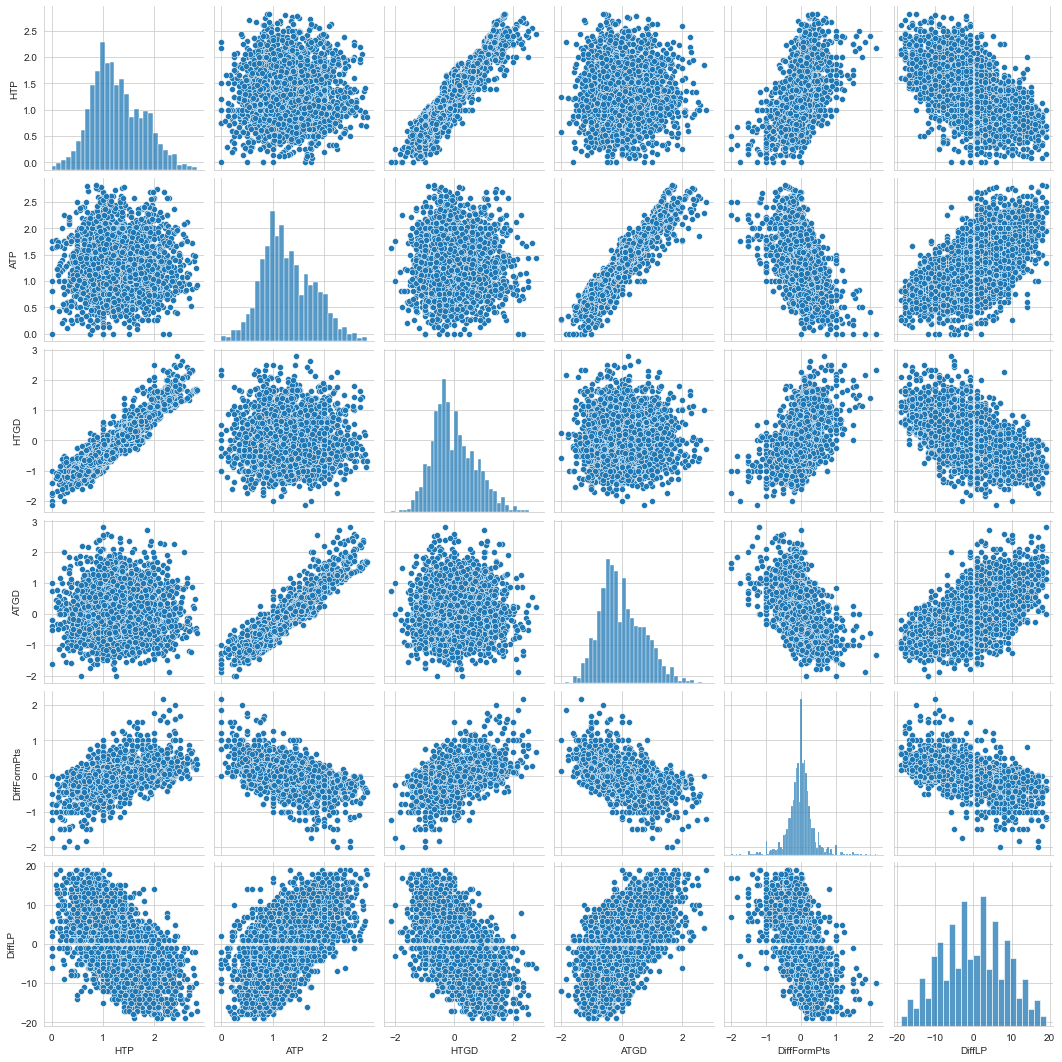

In [10]:
sns.pairplot(data)

In [11]:
X_all = data.drop(['FTR'], axis=1)
y_all = data['FTR']

In [12]:
from sklearn.preprocessing import scale
cols = [['HTGD','ATGD','HTP','ATP', 'DiffLP']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [13]:
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

In [14]:
def preprocess_features(X):    # Preprocesses the football data and converts catagorical variables into dummy variables.     
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
        # Collect the revised columns
        output = output.join(col_data)
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (24 total features):
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']


In [15]:
# Show the feature information by printing the first five rows
print("\nFeature values:")
display(X_all.head())


Feature values:


,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,HM3_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
30,-2.040172,0.921172,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,-1.005106,2.699009,-1.5,0.719458
31,-1.044255,0.921172,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0.352218,1.681320,-1.0,0.479918
32,0.449620,-0.570504,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0.352218,-0.014828,0.5,-2.035259
33,-1.542213,0.423947,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,-1.683769,0.324402,-1.0,0.120607
34,-2.040172,1.915622,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,-2.362431,2.020550,-2.0,2.036932


# Training Model

In [16]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [17]:
from time import time 
from sklearn.metrics import f1_score

In [18]:
def train_classifier(clf, X_train, y_train):    # Fits a classifier to the training data.
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

In [19]:
def predict_labels(clf, features, target):     # Makes predictions using a fit classifier based on F1 score. 
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))

In [20]:
def train_predict(clf, X_train, y_train, X_test, y_test):    #Train and predict using a classifer based on F1 score.
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print (f"F1 score and accuracy score for training set: {round(f1, 4)} , {round(acc, 4)}.")
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print (f"F1 score and accuracy score for test set: {round(f1, 4)} , {round(acc, 4)}.")

In [21]:
clf_A = LogisticRegression()
clf_B = xgb.XGBClassifier(seed = 82)
clf_C = RandomForestClassifier(criterion='gini', n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features='auto', oob_score=True, random_state=1)
train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print ('')

Training a LogisticRegression using a training set size of 3100. . .
Trained model in 0.0290 seconds
Made predictions in 0.0020 seconds.
0.6619977884260966 0.7041935483870968
F1 score and accuracy score for training set: 0.662 , 0.7042.
Made predictions in 0.0010 seconds.
F1 score and accuracy score for test set: 0.5714 , 0.64.

Training a XGBClassifier using a training set size of 3100. . .
[22:18:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Trained model in 0.2820 seconds
Made predictions in 0.0070 seconds.
0.9917533166009321 0.9925806451612903
F1 score and accuracy score for training set: 0.9918 , 0.9926.
Made predictions in 0.0040 seconds.
F1 score and accuracy score for test set: 0.6667 , 0.72.

Training a RandomForestClassifier using a training set size of 3100. . .
Trained model in 

# Tuning the parameters of XGBoost.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [23]:
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

In [24]:
clf = xgb.XGBClassifier(seed=2, eval_metric='mlogloss')

In [25]:
f1_scorer = make_scorer(f1_score,pos_label='H')

In [26]:
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

In [27]:
grid_obj = grid_obj.fit(X_train,y_train)

In [28]:
clf = grid_obj.best_estimator_
print (clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.4,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=2, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
              seed=2, subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [29]:
# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print (f"F1 score and accuracy score for training set: {round(f1, 4)} , {round(acc, 4)}.")

f1, acc = predict_labels(clf, X_test, y_test)
print (f"F1 score and accuracy score for test set: {round(f1, 4)} , {round(acc, 4)}.")

Made predictions in 0.0450 seconds.
F1 score and accuracy score for training set: 0.6734 , 0.7174.
Made predictions in 0.0040 seconds.
F1 score and accuracy score for test set: 0.4762 , 0.56.


# Fitting the model on the whole dataset for future predictions.

In [30]:
import pprint

In [31]:
parameters = { 'learning_rate' : [0.03],
               'n_estimators' : [20],
               'max_depth': [5],
               'min_child_weight': [5],
               'gamma':[0.2],
               'subsample':[0.8],
               'colsample_bytree':[0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-2]
             }  

In [32]:
clf = xgb.XGBClassifier(seed=2, eval_metric='mlogloss', max_depth=4)

In [33]:
f1_scorer = make_scorer(f1_score,pos_label='H')

In [34]:
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

In [35]:
grid_obj = grid_obj.fit(X_all,y_all)

In [36]:
# Get the estimator
clf = grid_obj.best_estimator_
print (clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.2,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=2, reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1,
              seed=2, subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [37]:
# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print (f"F1 score and accuracy score for training set: {round(f1, 4)} , {round(acc, 4)}.")

Made predictions in 0.0060 seconds.
F1 score and accuracy score for training set: 0.6966 , 0.7365.


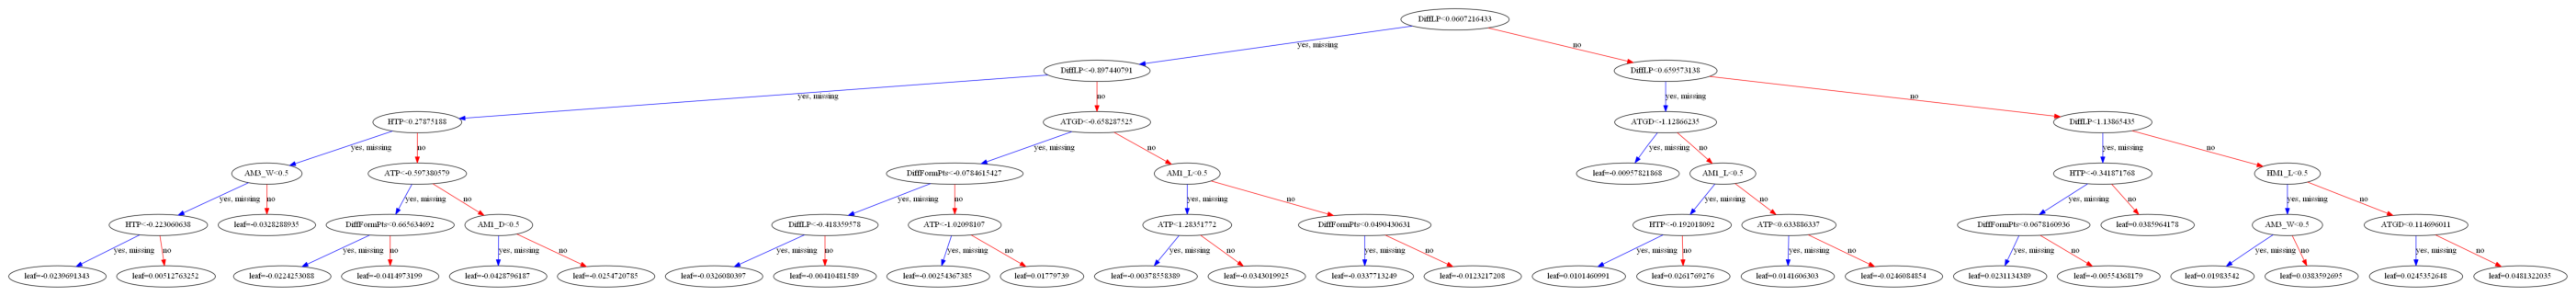

In [42]:
fig, ax = plt.subplots(figsize=(50, 30))
xgb.plot_tree(clf, num_trees=4, ax=ax)
plt.show()